<a href="https://colab.research.google.com/github/petre001/AIPI540/blob/main/main_figs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Neural Nets for Neural Images: Assessing Brain Age with Computer Vision
### Contributors: Dr. Jeffrey Petrella, Maria Williams

This project uses transfer learning to train a ResNet18 model to identify the age of a brain from its MRI scan. This kind of identification could potentially be used to flag various congnitive disorders such as Alzhiemers Disease if the "brain age" is identified as more advanced than the patient's chronological age.

## Step 1: Link Notebook to GitHub

In [18]:
# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "BrainAgingComputerVision" # Enter repo name
git_path = 'https://github.com/MRWilliamsGit/BrainAgingComputerVision.git'
!git clone "{git_path}"

rm: cannot remove './sample_data': No such file or directory
fatal: destination path 'BrainAgingComputerVision' already exists and is not an empty directory.


## Step 2: Install and Import Dependencies

In [2]:
#If an error regarding zipfile appears, simply run block again
!pip3 install -r "{os.path.join(repo_name,'requirements.txt')}"  > /dev/null

import os
import shutil
import numpy as np
import pandas as pd
import torch
from google.colab import drive
from google.colab import files
from matplotlib import pyplot as plt
from PIL import Image

from BrainAgingComputerVision.scripts.loaders import RegressionLoaders, SingleLoader
from BrainAgingComputerVision.scripts.Rpredicting import BatchPredict, SinglePredict

ERROR: Could not open requirements file: [Errno 2] No such file or directory: "{os.path.join(repo_name,'requirements.txt')}"


### Step 3: Load Model and Demo Images

This Model is a ResNet18 model that has been updated and trained with an average MAE of 5 years over 10 test sets.  

There are 10 images provided in image_data.zip for demonstration purposes: 





![](https://raw.githubusercontent.com/MRWilliamsGit/BrainAgingComputerVision/main/images/examples.png?raw=true)

In [17]:
#unzip example images
!unzip '/content/BrainAgingComputerVision/data/image_data.zip' > /dev/null
images = [f for f in os.listdir('/content') if os.path.isfile(os.path.join('/content', f))]

#get image metadata
filein = '/content/BrainAgingComputerVision/data/cn_age_df.csv'
filein2= '/content/BrainAgingComputerVision/data/ad_age_df.csv'
data = pd.read_csv(filein)
data2 = pd.read_csv(filein2)
data3 = pd.concat([data, data2], axis=0)

replace 118_A_val.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [15]:
data2.head()

,Data ID,ADNI Subject ID,MRI Image ID (Original),MRI Date,Image ID,Age,Research Group,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,36_A_train,130_S_5006,I348490,11/14/2012,I348490,68.4,AD,NaN,NaN,NaN,NaN,NaN
1,42_A_train,024_S_4905,I324279,8/16/2012,I324279,72.8,AD,NaN,NaN,NaN,NaN,NaN
2,43_A_train,130_S_4641,I295961,4/4/2012,I295961,73.7,AD,NaN,NaN,Row Labels,NaN,NaN
3,44_A_train,130_S_4641,I423659,5/2/2014,I423659,75.7,AD,NaN,NaN,002_S_5018,count,216.0
4,53_A_train,006_S_4867,I322012,8/7/2012,I322012,74.5,AD,NaN,NaN,003_S_1059,min,56.0


ValueError: ignored

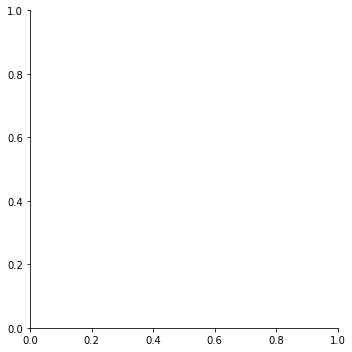

In [4]:
import seaborn as sns
sns.displot(data3, x="Age",binwidth=2, hue = 'Research Group')

In [24]:
#load model
model = torch.load('/content/BrainAgingComputerVision/models/model.pt')

### Step 4: Choose Image 

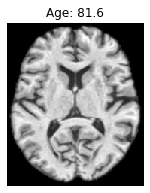

In [ ]:
#Pick one of the 10 images to see it and see its age
pick = 1

#open the image
here = os.path.join('/content/',images[pick-1])
image_3D = np.load(here)
im = Image.fromarray((image_3D[85] * 255).astype(np.uint8))
im = np.rot90(im)

#plot the image
plt.imshow(im, interpolation='nearest', cmap='gray')
imgn = images[pick-1].split(".")[0]
line = data.loc[data['Data ID'] == imgn]
label = line.iloc[0][5]
plt.title("Age: " + str(label))
plt.axis('off');


### Step 4: Get Prediction!

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#get prediction
img = (image_3D[85] * 255).astype(np.uint8)
image = SingleLoader(img)
pred = SinglePredict(model, image, device)
print("Pred: "+str(pred))

Pred: 86.4
